![cover.png](https://assets-global.website-files.com/618d852d383de946ce0e3fa5/6495da7241185414c12ddc02_videoGamePlanet.PNG)

# Overview of Exploratory Data Analysis on Video Games Data

The video games industry is a multi-billion dollar market that continues to grow every year. Understanding the trends and patterns in video game sales, genres, and platforms can provide valuable insights for developers, marketers, and stakeholders. In this notebook, we will perform an Exploratory Data Analysis (EDA) on video game data to uncover interesting patterns and trends.

### Objectives:
1. **Understand the Dataset**: Gain a comprehensive understanding of the data by examining its structure, variables, and basic statistics.
2. **Data Cleaning**: Identify and handle missing or erroneous data to ensure the integrity of our analysis.
3. **Descriptive Statistics**: Calculate and visualize summary statistics to get an overview of the data's central tendency and dispersion.
4. **Sales Analysis**: Explore the distribution of video game sales across different regions, platforms, and genres.
5. **Trends Over Time**: Analyze the trends in video game sales over time to identify significant growth periods or declines.
6. **Genre and Platform Analysis**: Investigate the popularity of various genres and platforms to understand consumer preferences.
7. **Correlation Analysis**: Examine correlations between different variables to identify potential relationships and insights.

### Methodology:
1. **Data Loading**: Load the dataset into a pandas DataFrame for analysis.
2. **Data Cleaning**: Handle missing values, outliers, and inconsistencies in the data.
3. **Exploratory Visualizations**: Use visualizations such as histograms, bar plots, line charts, and scatter plots to explore the data.
4. **Statistical Analysis**: Apply statistical techniques to summarize the data and identify key trends.

### Key Findings:
- Sales distribution across regions and platforms.
- Popular genres and their market share.
- Yearly trends in video game sales.
- Relationships between different variables such as sales, genre, and platform.

### Conclusion:
The EDA on video game data provides valuable insights into the industry. By understanding the patterns and trends, stakeholders can make informed decisions to drive growth and innovation in the video games market.

# Importing Necessary Libraries

In [1]:
# Intermediate Friendly Exploratory Data Analysis on Video Games Sales.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Video Games Sales Data

In [2]:
# Viewing Our DataFrame!
df = pd.read_csv("/kaggle/input/video-game-sales-analyze/vgsales new.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


# Descriptive Analytics of **This Data**

In [3]:
# Knowing about it using info and describe methods.
print(df.info(),"\n\n\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None 



               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933     

# Visualizing Null Data

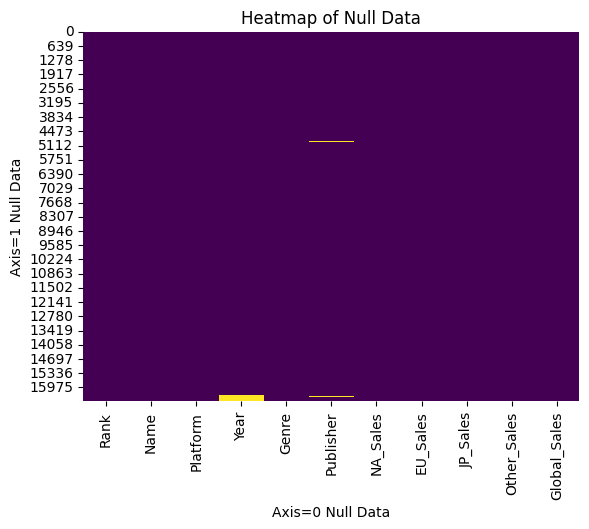

In [4]:
# Heatmap Representation of Null Data shows that out of total around 16k rows, only about 250-300 "Year" values and less than 100 "Publisher" values are Null.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.xlabel("Axis=0 Null Data")
plt.ylabel("Axis=1 Null Data")
plt.title("Heatmap of Null Data")
plt.show()

# Droping Null along with Duplicates

In [5]:
# Print below confirms our rough assumptions, now we will drop Null and Duplicates values.
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


# Boxplot of Regional Sales

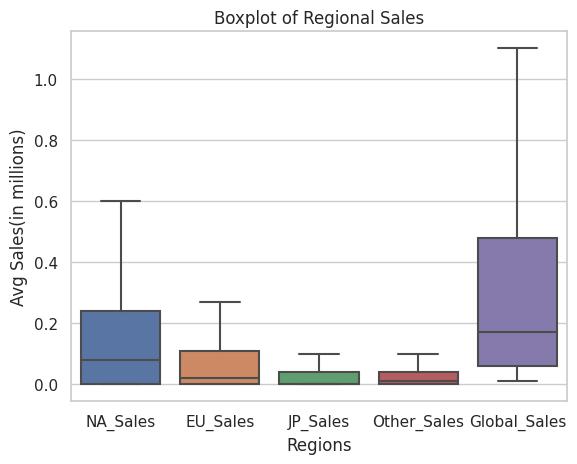

In [6]:
# We dropped "Rank" and "Year" as rest numerical columns are sales in different regions, so we represented them as boxplot.
kf = df.drop(["Rank","Year"],axis=1)
sns.set(style="whitegrid")
sns.boxplot(data=kf, showfliers = False)
plt.xlabel("Regions")
plt.ylabel("Avg Sales(in millions)")
plt.title("Boxplot of Regional Sales")
plt.show()

# Games Count by Platforms

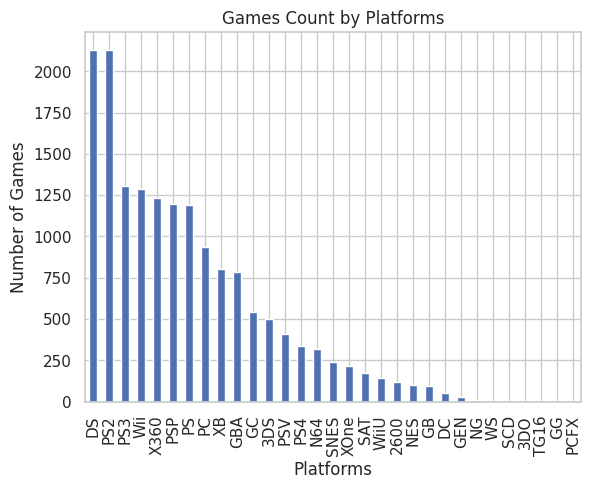

In [7]:
# Here is the Games Count by Platforms, using simple bar graph representation.
df['Platform'].value_counts().plot(kind="bar")
plt.xlabel("Platforms")
plt.ylabel("Number of Games")
plt.title("Games Count by Platforms")
plt.show()

# Scatter Plots between Numerical Variables

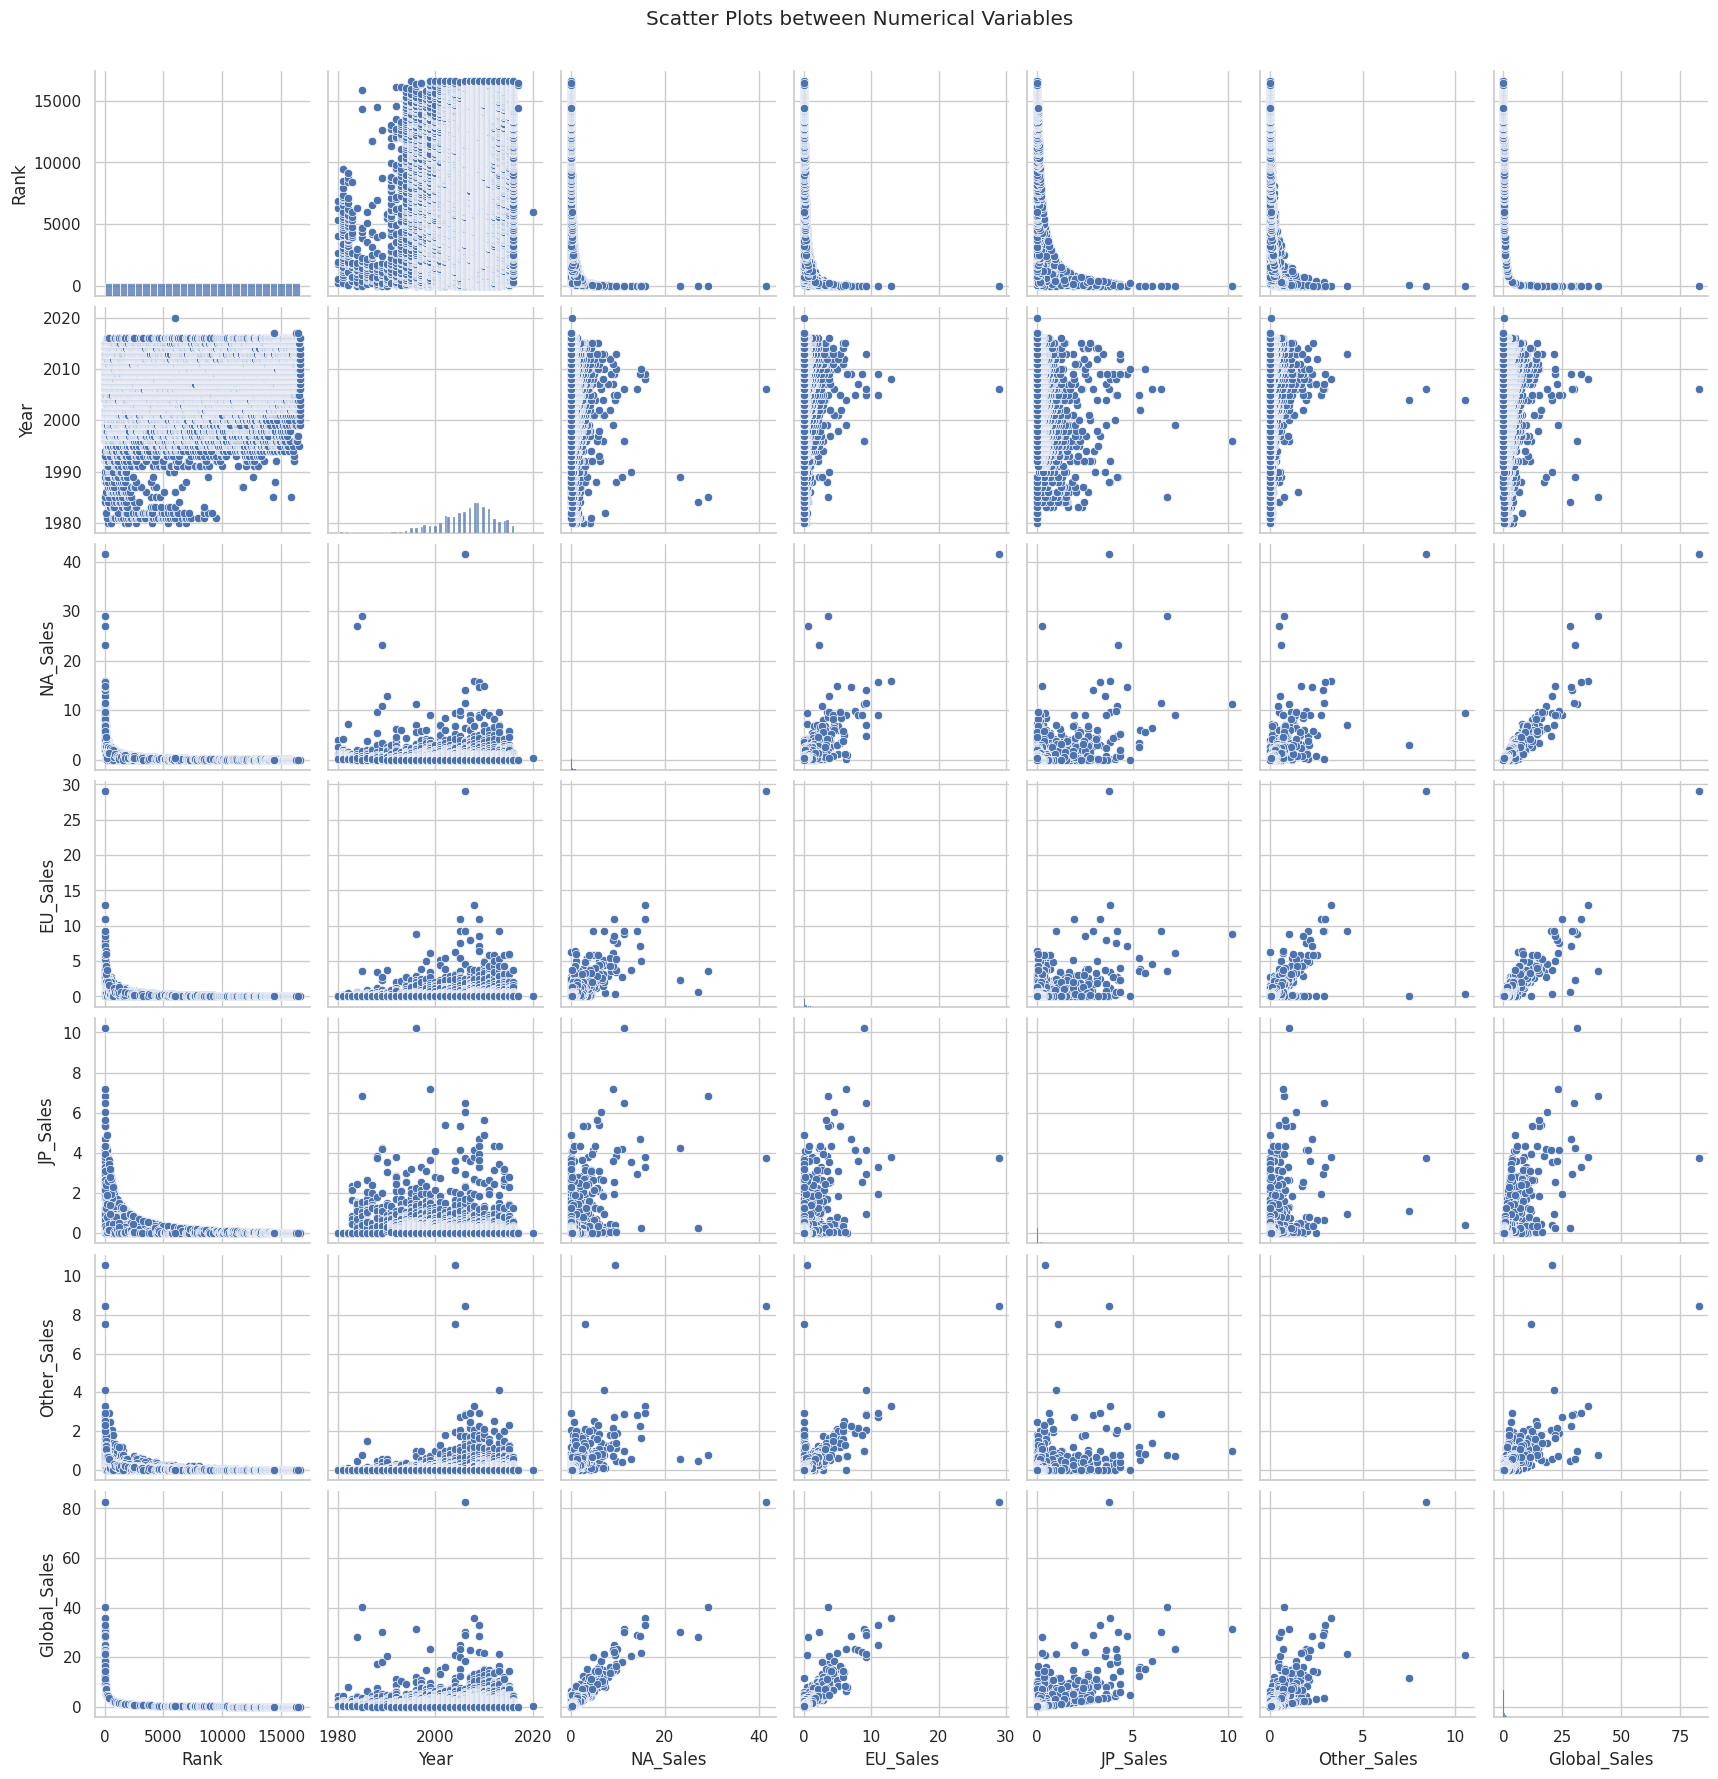

In [8]:
# This is a very important step in EDA to view scatterplotic relations between all numerical quantities in a dataset.
pairplot = sns.pairplot(df.select_dtypes(include=np.number))
pairplot.fig.suptitle("Scatter Plots between Numerical Variables", y=1.02) 
plt.show()

# Top Publishers in Japan

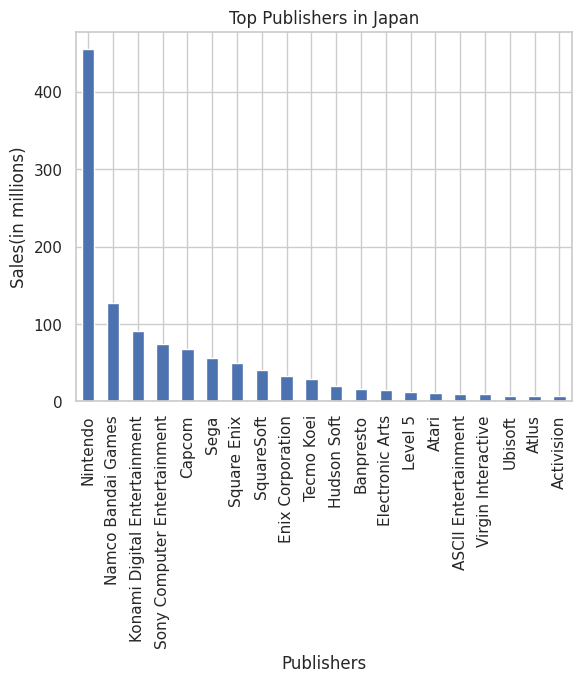

In [9]:
# After checking all relations, we move on the see top game publishers in japan from where gaming giants like nintendo and sony originated from.
df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False).head(20).plot(kind="bar")
plt.xlabel("Publishers")
plt.ylabel("Sales(in millions)")
plt.title("Top Publishers in Japan")
plt.show()

# Correlation Heatmap

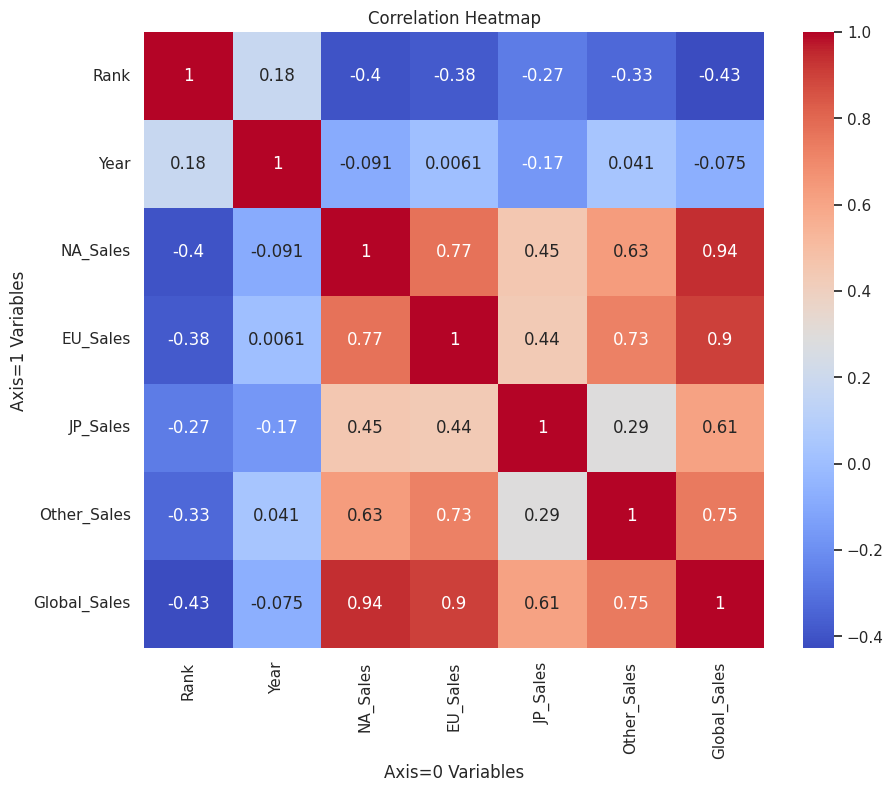

In [10]:
#This is our new attempt to see relations by building correlation heatmap.
plt.figure(figsize=(10, 8))
kf = df.select_dtypes(include=["number"])
sns.heatmap(kf.corr(), annot=True, cmap='coolwarm')
plt.xlabel("Axis=0 Variables")
plt.ylabel("Axis=1 Variables")
plt.title("Correlation Heatmap")
plt.show()

# Violin Plot of NA/EU Sales with Genre

['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'] 



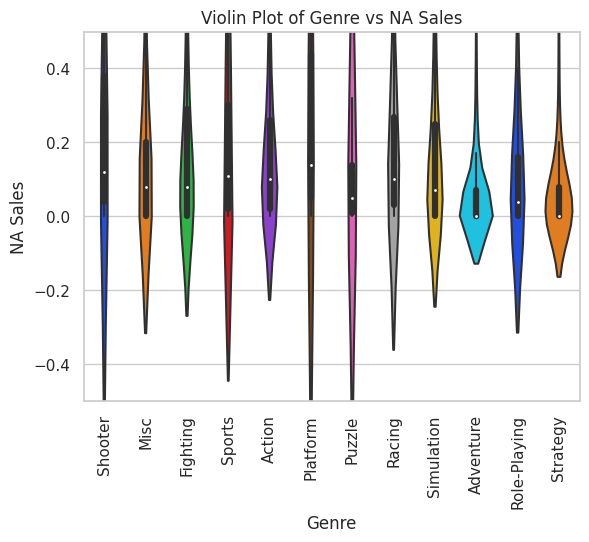

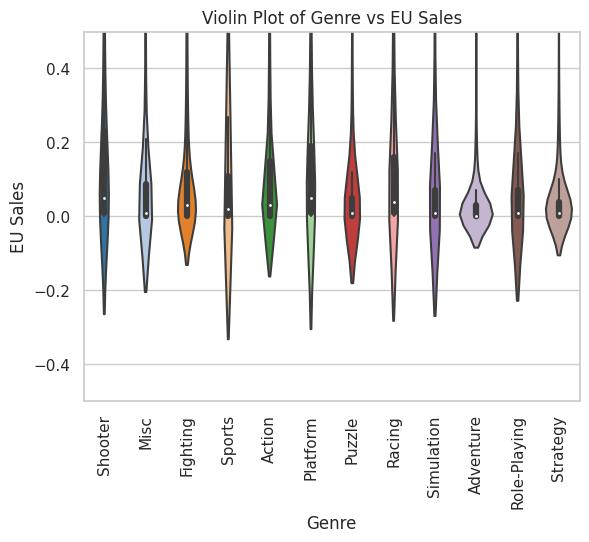

In [11]:
# Violin Plot is combination of Box Plot with a Kernel Density Plot. Here, x axis is rotated and y axis is limited to enhance the visibility of dataset.
ef = df["Genre"].value_counts().index.tolist()
print(ef,"\n")
kf = df
sns.violinplot(x="Genre", y = "NA_Sales", data=kf, palette = "bright")
plt.xlabel("Genre")
plt.ylabel("NA Sales")
plt.title("Violin Plot of Genre vs NA Sales")
plt.xticks(rotation=90)
plt.ylim(-0.5,0.5)
plt.show()
print("\n\n\n")
sns.violinplot(x="Genre", y = "EU_Sales", data=kf, palette = "tab20")
plt.xlabel("Genre")
plt.ylabel("EU Sales")
plt.title("Violin Plot of Genre vs EU Sales")
plt.xticks(rotation=90)
plt.ylim(-0.5,0.5)
plt.show()

# Distribution of Sales by Year

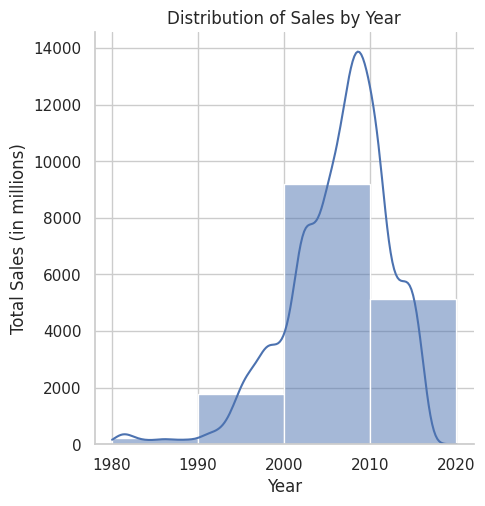

Total sales from 2000 to 2010: 5236.370000000001 million
Total sales from 2010 to 2020: 2520.4 million


In [12]:
# This shows how gaming market is performing over the years, representation is histogramic. This data however is not complete as gaming nowadays is more profitable (We can verify it on internet). We can proof that data is inaccurate by using conditional statements and print it.
sns.displot(df, x="Year",kde=True, binwidth=10)
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.title("Distribution of Sales by Year")
plt.show()
sales_2000_2010 = df[(df['Year'] >= 2000) & (df['Year'] <= 2010)]['Global_Sales'].sum()
sales_2010_2020 = df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]['Global_Sales'].sum()
print(f"Total sales from 2000 to 2010: {sales_2000_2010} million")
print(f"Total sales from 2010 to 2020: {sales_2010_2020} million")

# 3D Surface Plots of Sales/Rank using WireFrame

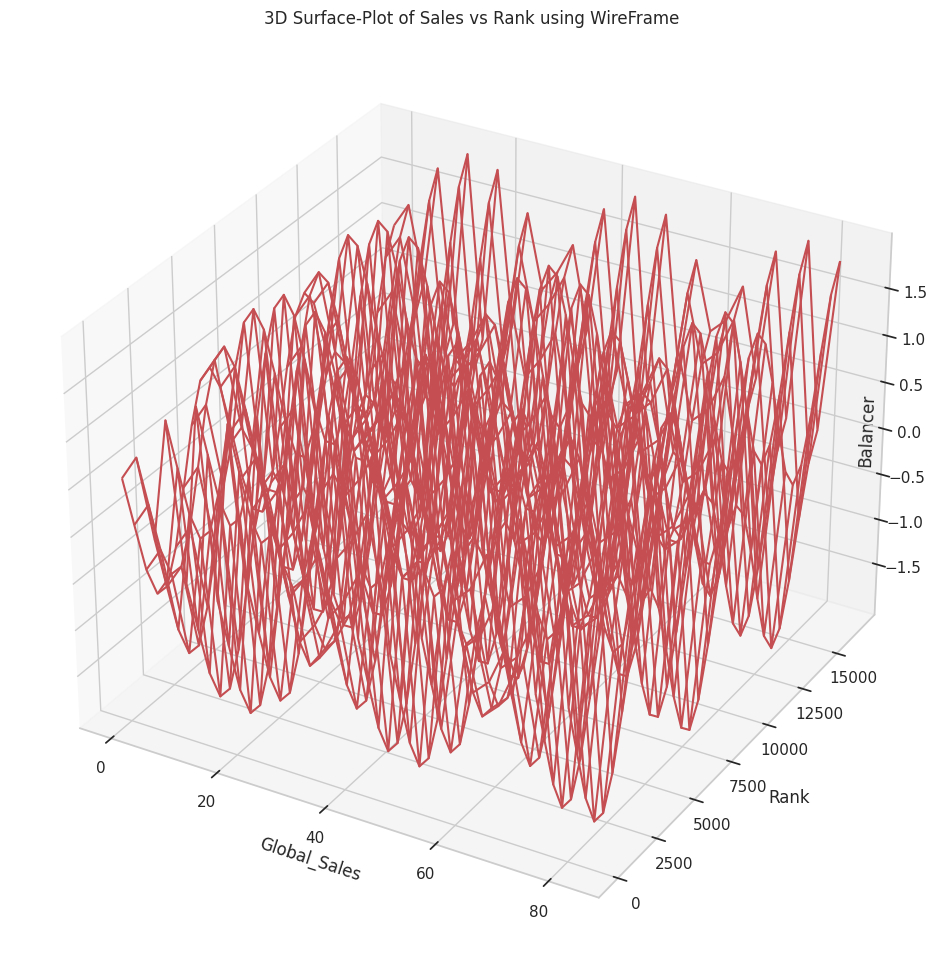

In [13]:
# This was comparison between "Global_Sales" and "Rank" but z axis here is just a balancer to place WireFrame in between. Uncomment 3 axes limiter below to set your own limits. Note, x and y axes are adjusted.
%matplotlib inline
com = plt.figure(figsize=(12,12))
ax = com.add_subplot(111, projection="3d")
x = df["Global_Sales"]
y = df["Rank"]
z = np.zeros(len(x))
x, y = np.meshgrid(np.linspace(x.min(),x.max(),30), np.linspace(y.min(),y.max(),30))
z = np.sin(x) + np.cos(y)
ax.plot_wireframe(x,y,z, color = "r")
ax.set_xlabel("Global_Sales")
ax.set_ylabel("Rank", labelpad=10)
ax.set_zlabel("Balancer", labelpad=-28)
# ax.set_xlim(0,30)
# ax.set_ylim(0,15000)
# ax.set_zlim(0,2000)
ax.set_title("3D Surface-Plot of Sales vs Rank using WireFrame")
plt.show()

># Now, Let us conclude our Notebook, Thank You!